# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rosita Angel Cahyadi
- **Email:** rositaangel143@gmail.com
- **ID Dicoding:** M232D5X1763

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dari waktu ke waktu, dan pada periode kapan terjadi peningkatan PM2.5?
- Stasiun mana yang memiliki konsentrasi PM2.5 tertinggi?

## Import Semua Packages/Library yang Digunakan

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

## Data Wrangling

### Gathering Data

In [101]:
url_aotizhongxin = "https://drive.google.com/uc?export=download&id=1ASHlh70LV-Z884b-Q_4qkOETYLbwJjrn"
Aotizhongxin_df = pd.read_csv(url_aotizhongxin)

Aotizhongxin_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [102]:
url_changping = "https://drive.google.com/uc?export=download&id=1EhKigNA6dlApPruT8QQ_5jNv1YlYkoKo"
Changping_df = pd.read_csv(url_changping)

Changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [103]:
url_dingling = "https://drive.google.com/uc?export=download&id=1s6ntxYItWa0F7doIU5fTUb6M3zjW04xf"
Dingling_df = pd.read_csv(url_dingling)

Dingling_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [104]:
url_dongsi = "https://drive.google.com/uc?export=download&id=1T-EfddS5GzKuze9nCIbZg1aRhg0aem__"
Dongsi_df = pd.read_csv(url_dongsi)

Dongsi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [105]:
url_guanyuan = "https://drive.google.com/uc?export=download&id=14fQ-DUlGMV1GotPBzniBlGYsKY0qUzsB"
Guanyuan_df = pd.read_csv(url_guanyuan)

Guanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [106]:
url_gucheng = "https://drive.google.com/uc?export=download&id=13z-0Hmp0mAejJMRwTodR-BSSteOnNe0a"
Gucheng_df = pd.read_csv(url_gucheng)

Gucheng_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
35060,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
35061,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
35062,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [107]:
url_huairou = "https://drive.google.com/uc?export=download&id=1pctzNZZcZhpk7P50jKw3Kyh5jG8oXshK"
Huairou_df = pd.read_csv(url_huairou)

Huairou_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


In [108]:
url_nongzhanguan = "https://drive.google.com/uc?export=download&id=13HZuE79yYhanfNIrf8H7Mm7IhsLmSolC"
Nongzhanguan_df = pd.read_csv(url_nongzhanguan)

Nongzhanguan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [109]:
url_shunyi = "https://drive.google.com/uc?export=download&id=1afDn2r4-clcyB663w1h3vZBo5Fm5VLYX"
Shunyi_df = pd.read_csv(url_shunyi)

Shunyi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [110]:
url_tiantan = "https://drive.google.com/uc?export=download&id=1wvN3CMyvUIIoPYBPvV0OX6HlPHVYI0mW"
Tiantan_df = pd.read_csv(url_tiantan)

Tiantan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [111]:
url_wanliu = "https://drive.google.com/uc?export=download&id=1L0grjH4jy0hcSvvAePan7hDf97yqm-kJ"
Wanliu_df = pd.read_csv(url_wanliu)

Wanliu_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [112]:
url_wanshouxigong = "https://drive.google.com/uc?export=download&id=1dIOyWs5hYYvmaGS7qxHMZ4RCYhhXwVOg"
Wanshouxigong_df = pd.read_csv(url_wanshouxigong)

Wanshouxigong_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Terdapat 12 dataset dalam sumber database "Air Quality" dengan memiliki 18 fitur yang sama pada setiap datasetnya.
- Dataset mencakup tiga kategori utama fitur:
  - konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3)
  - kondisi meteorologi (TEMP, PRES, DEWP, RAIN, WSPM), dan
  - komponen waktu (year, month, day, hour).
- Semua dataset memiliki rentang waktu yang sama yaitu tanggal 1 Maret 2013 sampai 28 Februari 2017.
- Terdapat beberapa kolom kosong (NaN) pada setiap dataset yang nantinya dapat dibersihkan saat bagian cleaning data.

### Assessing Data

### Melihat Tabel `Aotizhongxin_df`

In [113]:
Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [114]:
Aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [115]:
print("Jumlah duplikasi: ", Aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [116]:
Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Melihat Tabel `Changping_df`

In [117]:
Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [118]:
Changping_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [119]:
print("Jumlah duplikasi: ", Changping_df.duplicated().sum())
Changping_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Melihat Tabel `Dingling_df`

In [120]:
Dingling_df.info()
print("Jumlah duplikasi: ", Dingling_df.duplicated().sum())
Dingling_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [121]:
Dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


### Melihat Tabel `Dongsi_df`

In [122]:
Dongsi_df.info()
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())
Dongsi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [123]:
Dongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


### Melihat Tabel `Guanyan_df`

In [124]:
Guanyuan_df.info()
print("Jumlah duplikasi: ", Guanyuan_df.duplicated().sum())
Guanyuan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [125]:
Guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


### Melihat Tabel `Gucheng_df`

In [126]:
Gucheng_df.info()
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())
Gucheng_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [127]:
Gucheng_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


### Melihat Tabel `Huairou_df`

In [128]:
Huairou_df.info()
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())
Huairou_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [129]:
Huairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


### Melihat Tabel `Nongzhanguan_df`

In [130]:
Nongzhanguan_df.info()
print("Jumlah duplikasi: ", Nongzhanguan_df.duplicated().sum())
Nongzhanguan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [131]:
Nongzhanguan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


### Melihat Tabel `Shunyi_df`

In [132]:
Shunyi_df.info()
print("Jumlah duplikasi: ", Shunyi_df.duplicated().sum())
Shunyi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [133]:
Shunyi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


### Melihat Tabel `Tiantan_df`

In [134]:
Tiantan_df.info()
print("Jumlah duplikasi: ", Tiantan_df.duplicated().sum())
Tiantan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [135]:
Tiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


### Melihat Tabel `Wanliu_df`

In [136]:
Wanliu_df.info()
print("Jumlah duplikasi: ", Wanliu_df.duplicated().sum())
Wanliu_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [137]:
Wanliu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


### Melihat Tabel `Wanshouxigong_df`

In [138]:
Wanshouxigong_df.info()
print("Jumlah duplikasi: ", Wanshouxigong_df.duplicated().sum())
Wanshouxigong_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [139]:
Wanshouxigong_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


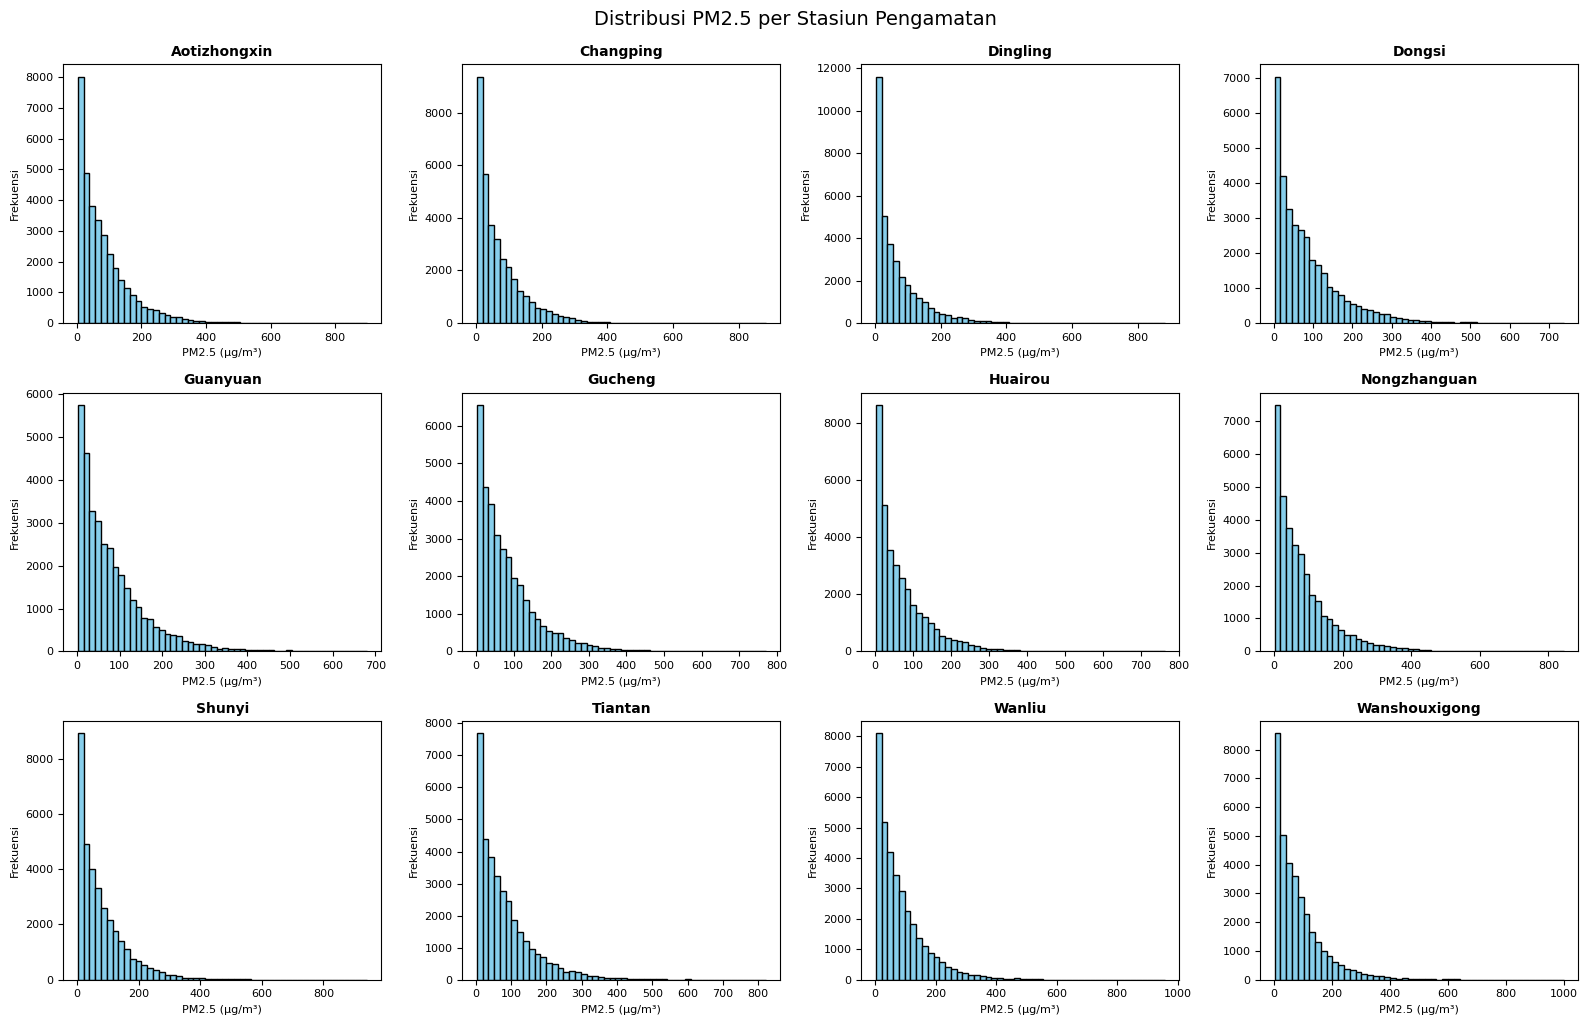

In [140]:
# Periksa Fitur PM2.5 untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['PM2.5'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('PM2.5 (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi PM2.5 per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

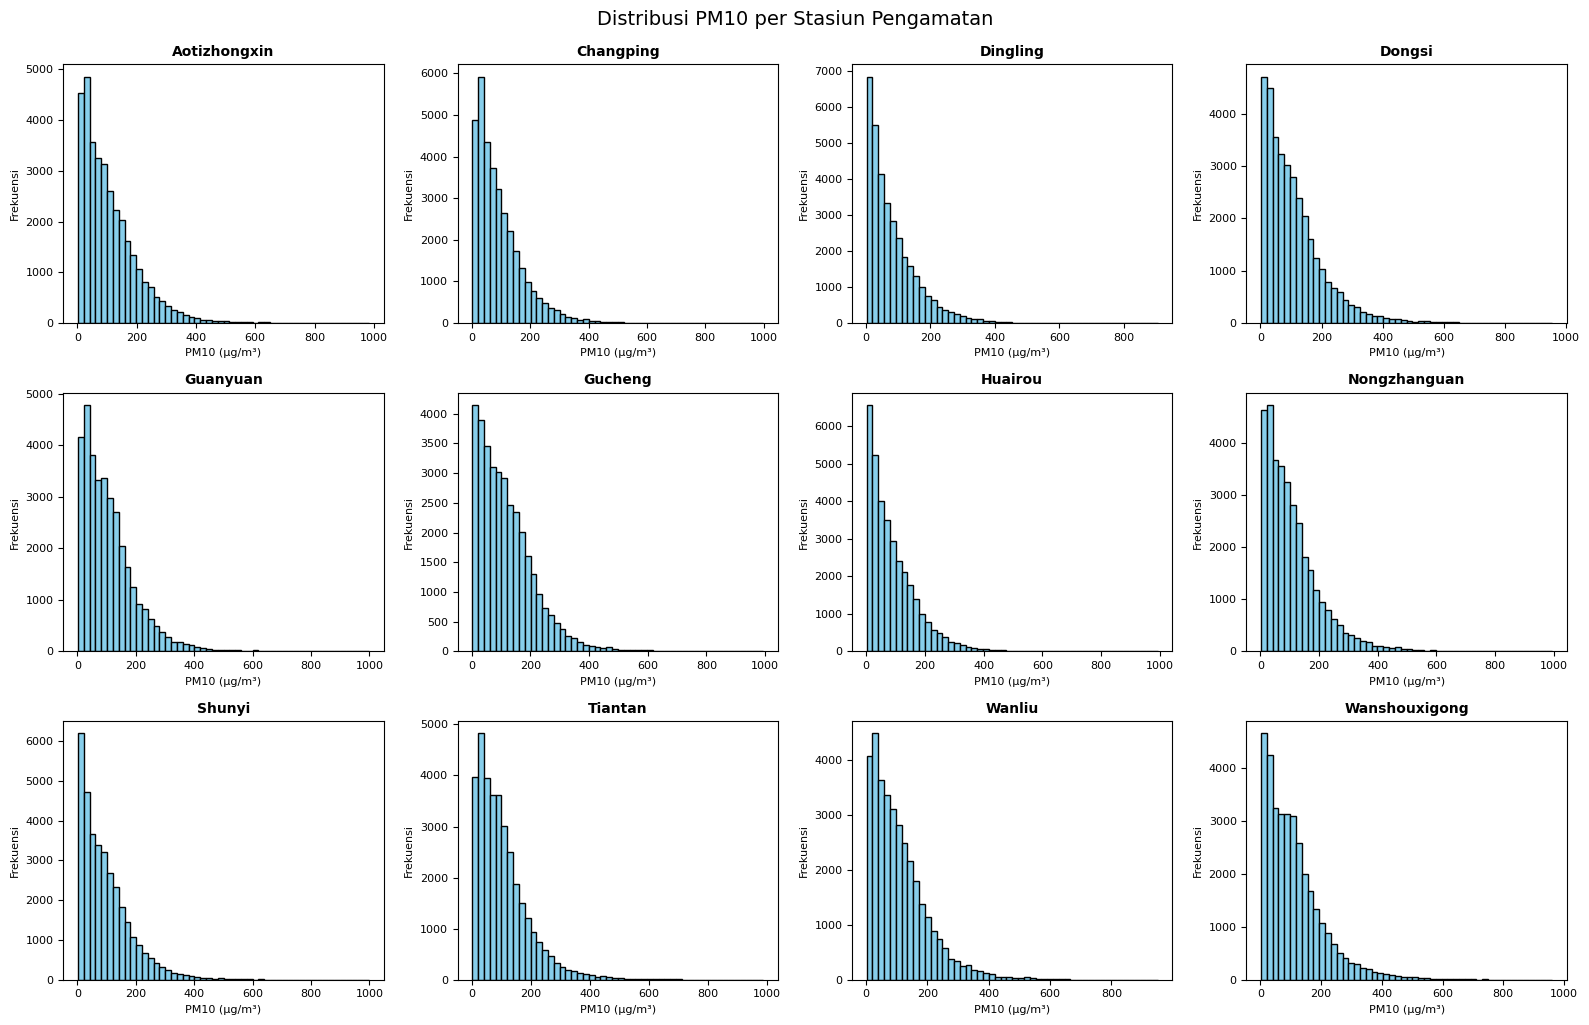

In [141]:
# Periksa Fitur PM10 untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['PM10'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('PM10 (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi PM10 per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

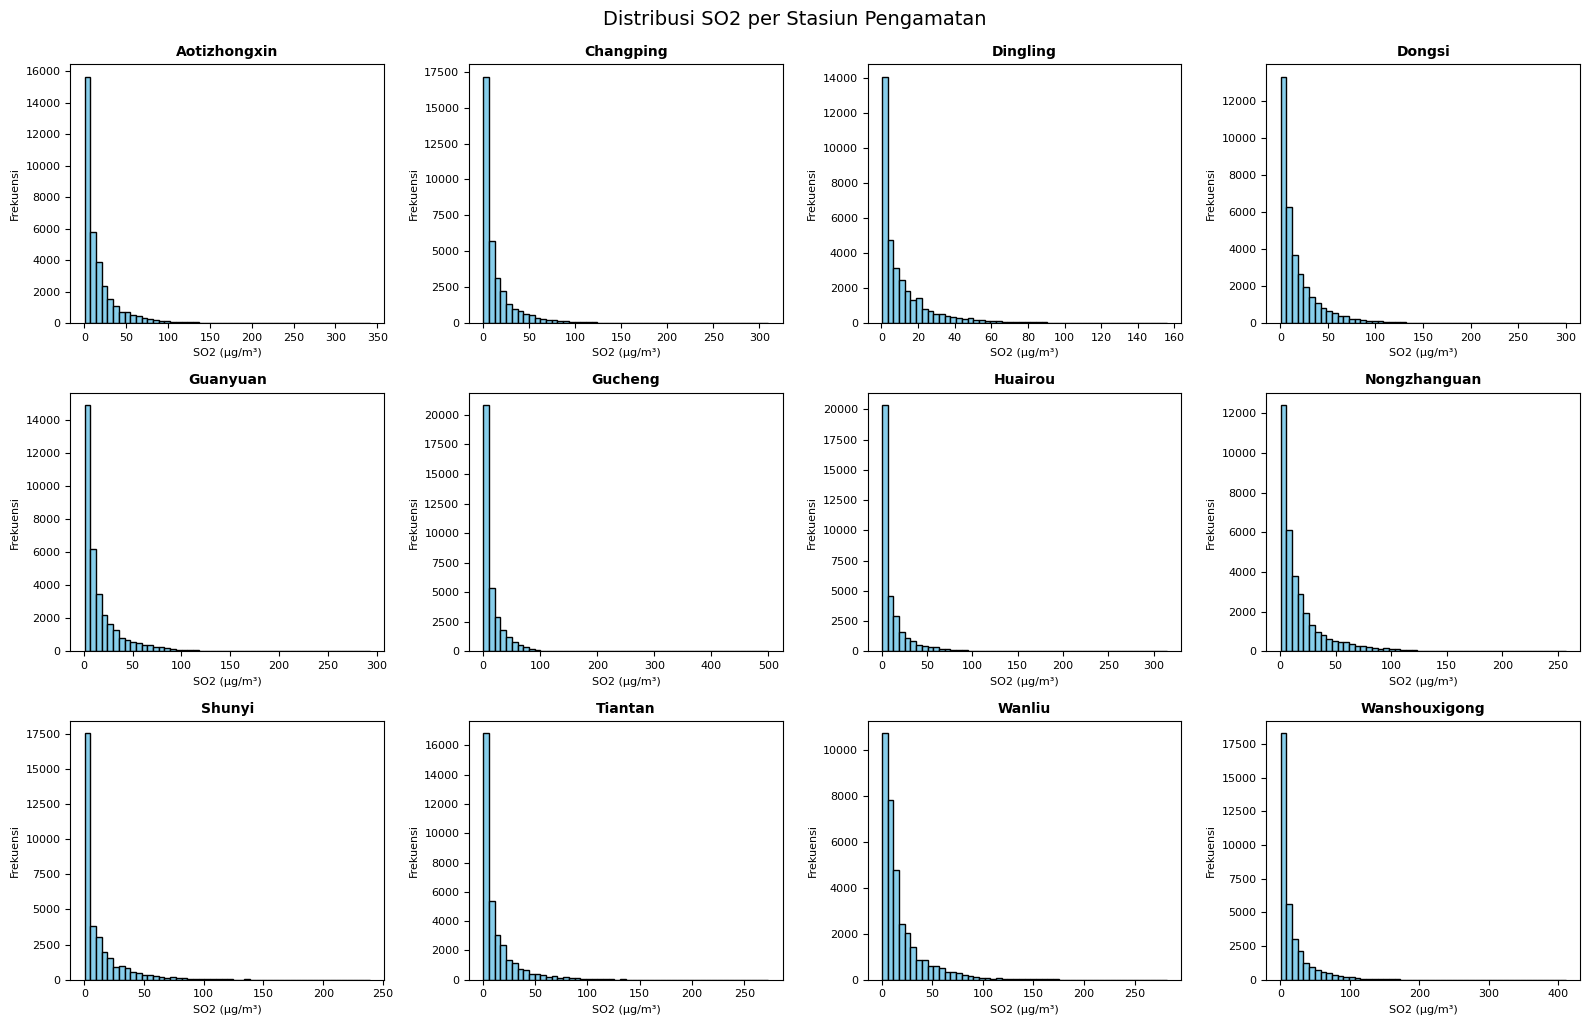

In [142]:
# Periksa Fitur SO2 untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['SO2'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('SO2 (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi SO2 per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

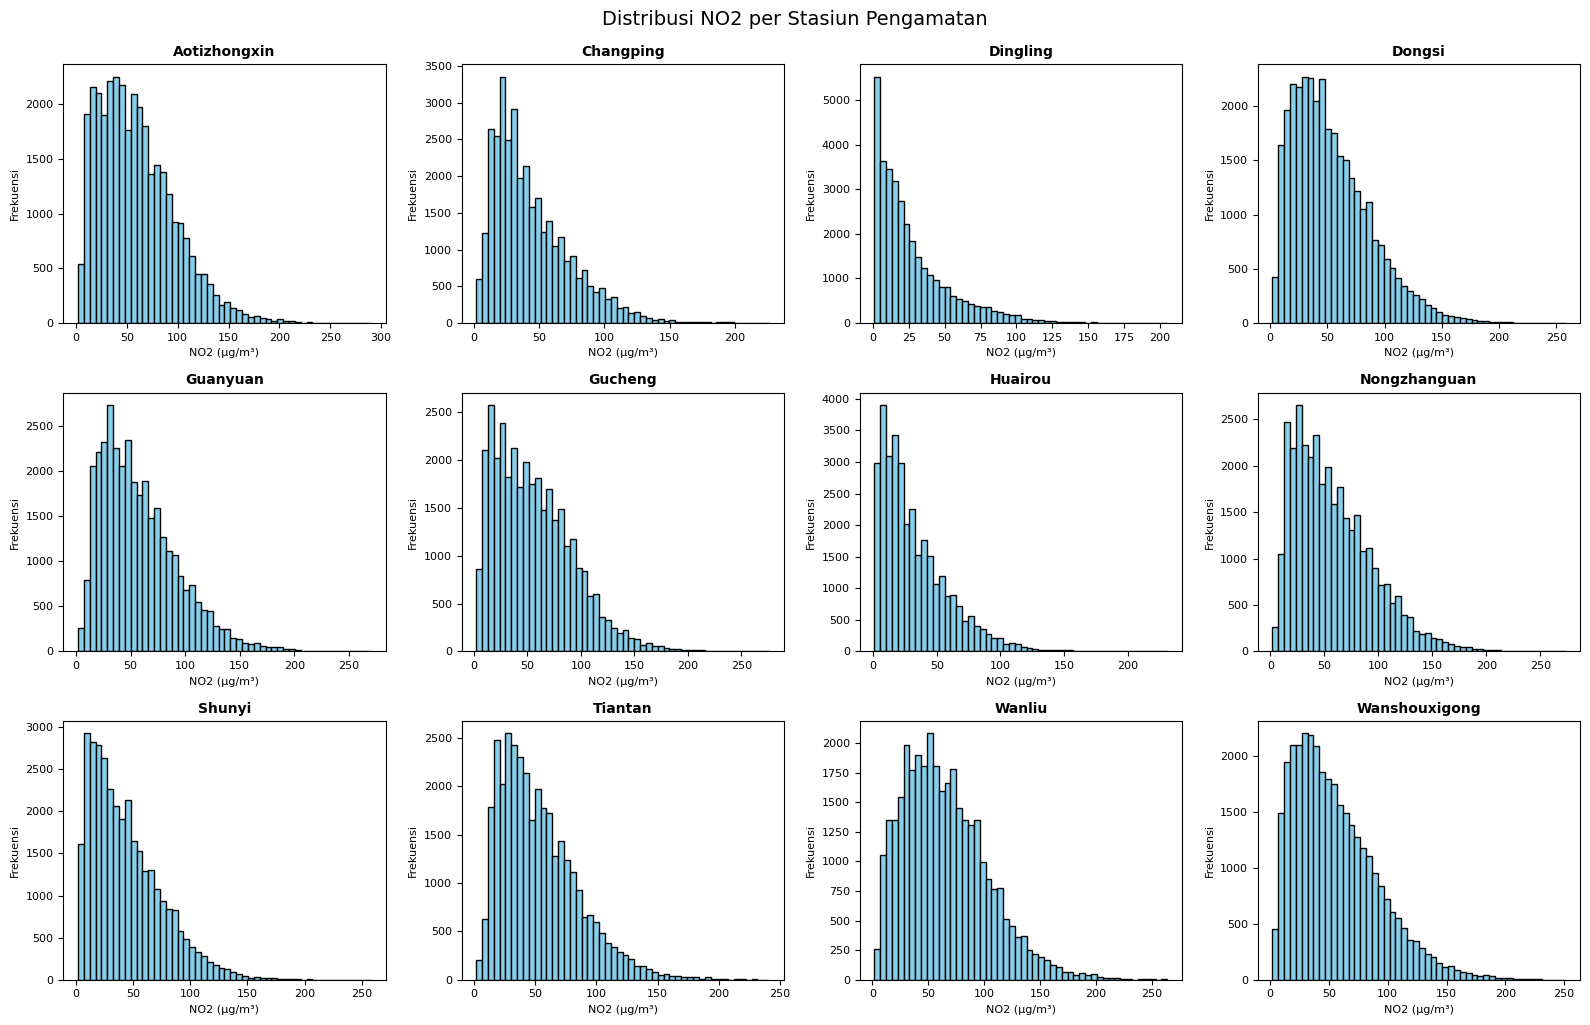

In [143]:
# Periksa Fitur NO2 untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['NO2'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('NO2 (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi NO2 per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

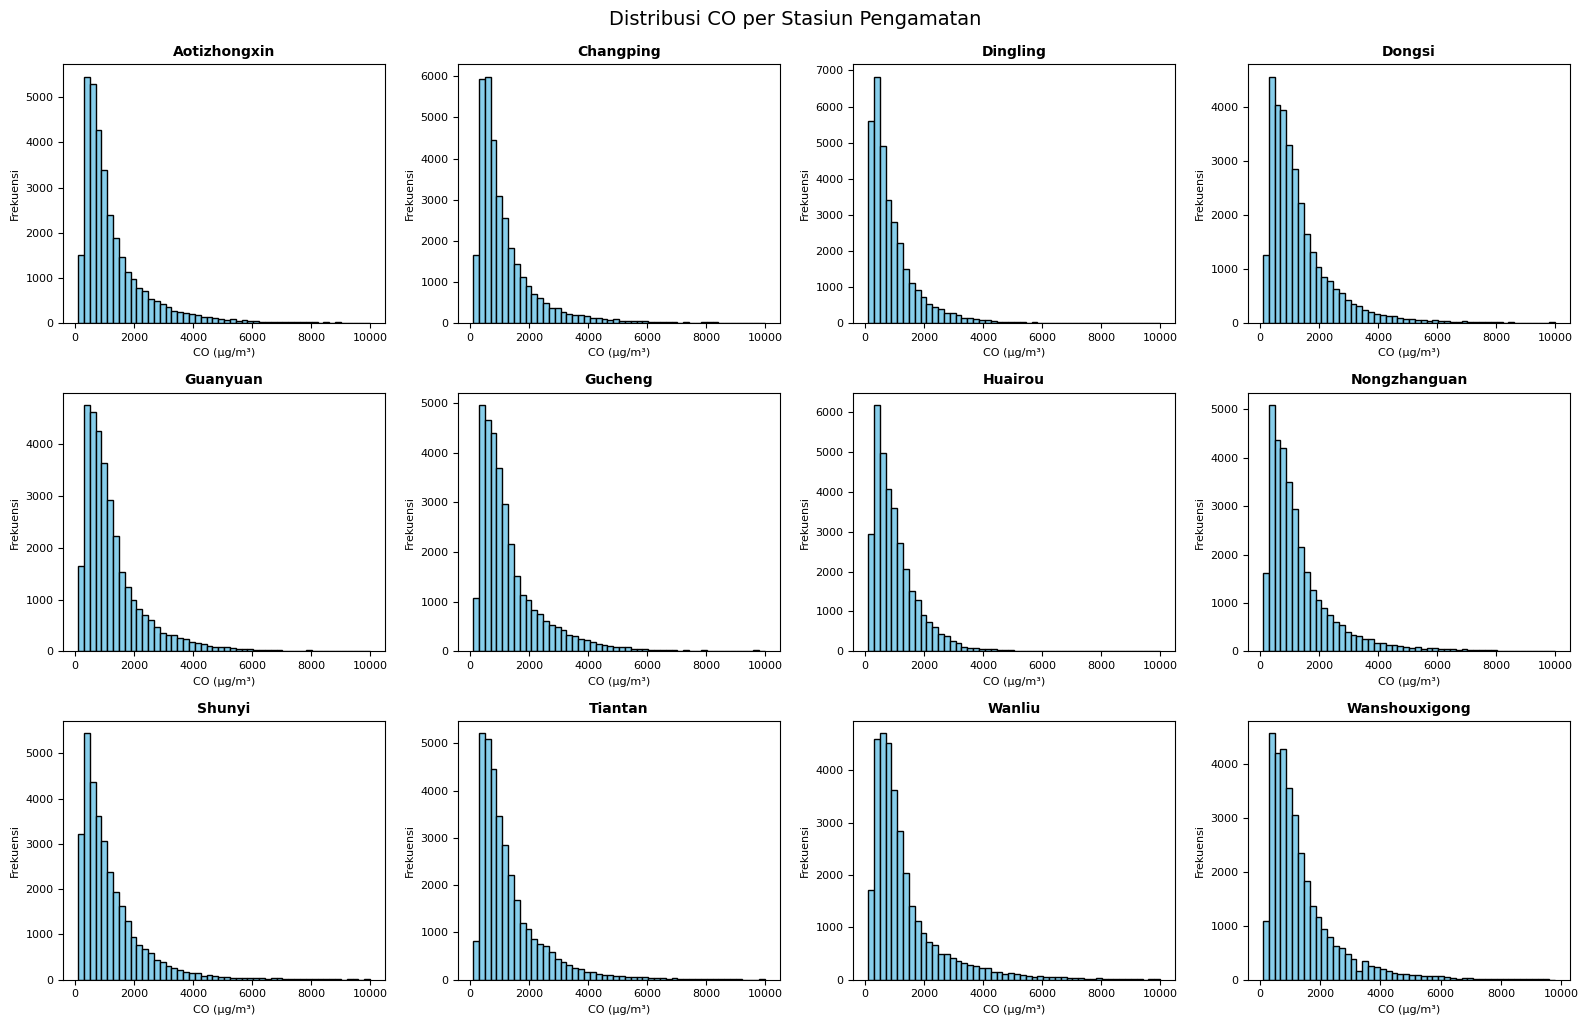

In [144]:
# Periksa Fitur CO untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['CO'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('CO (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi CO per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

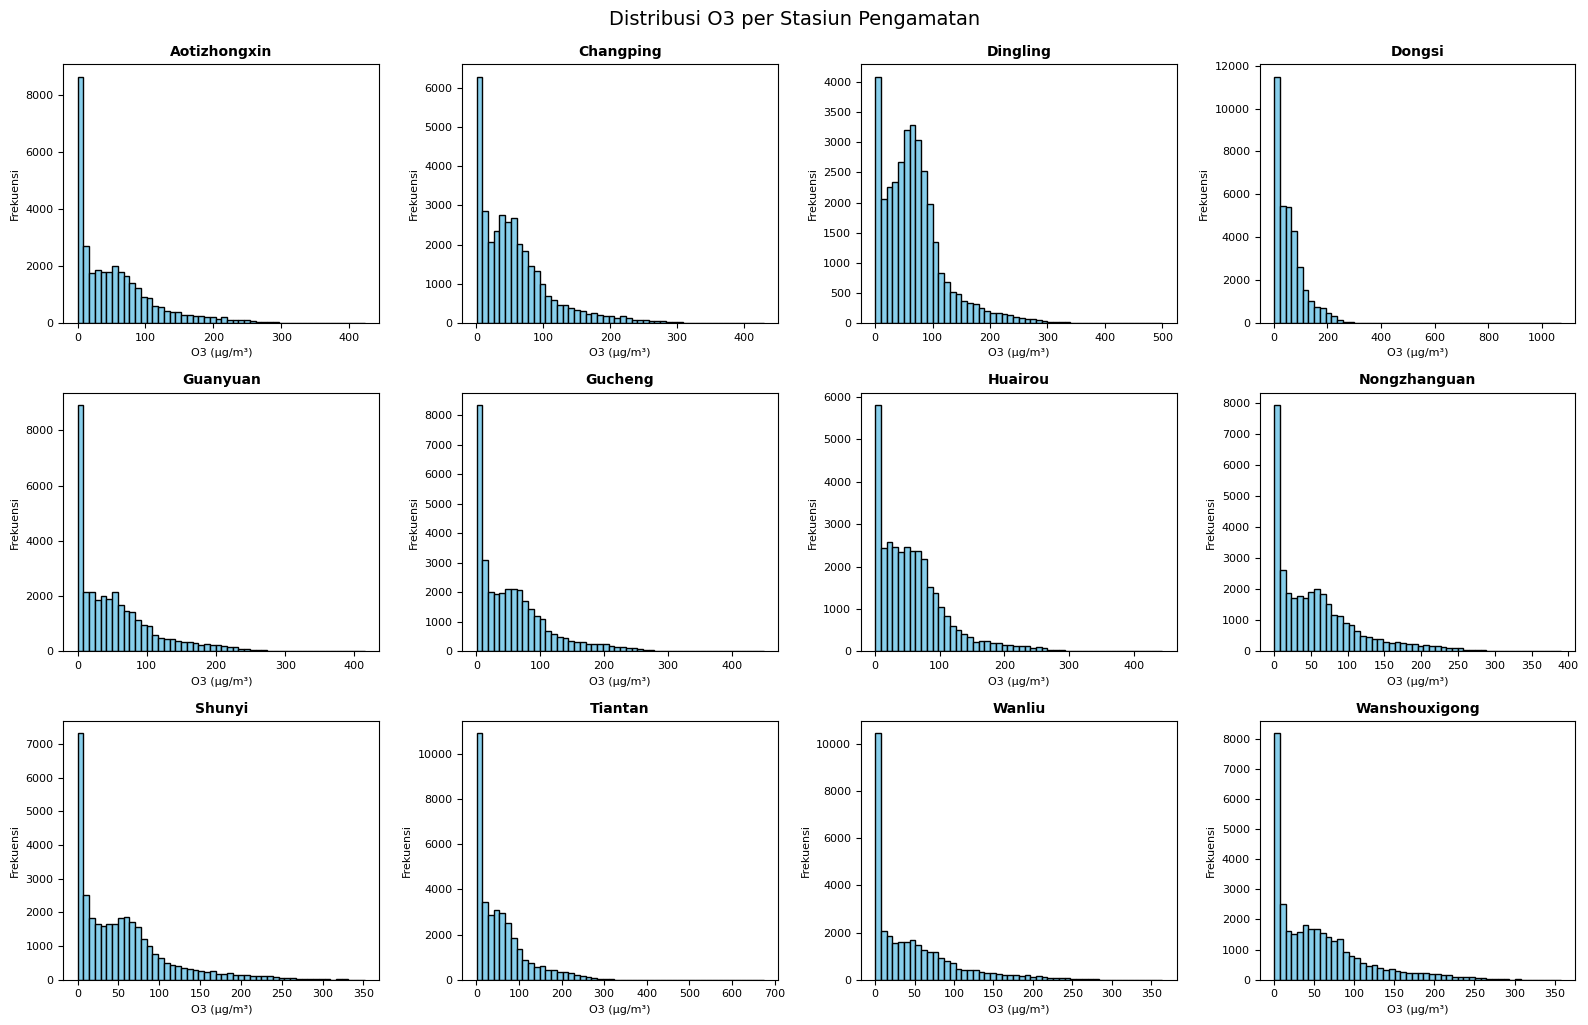

In [145]:
# Periksa Fitur O3 untuk semua fitur
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(zip(stations, dfs)):
    axes[i].hist(df['O3'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(name, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('O3 (µg/m³)', fontsize=8)
    axes[i].set_ylabel('Frekuensi', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Distribusi O3 per Stasiun Pengamatan', fontsize=14, y=1.02)
plt.show()

**Insight:**
- Pada kedua belas dataset yang telah dievaluasi, semuanya memiliki pola yang sama yaitu:
  - Banyak _missing values_ pada fitur konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3), kemudian sedikit pada fitur kondisi meteorologi (TEMP, PRES, DEWP, RAIN, WSPM).
  - Komponen waktu memiliki data yang lengkap dan tidak adanya anomali.
  - Dataset tidak terdapat duplikasi.
  - Tingginya standar deviasi pada beberapa fitur konsentrasi polutan yang menandakan adanya variasi kebersihan udara pada hari-hari tertentu.

- Visualisasi distribusi menggunakan histogram menunjukkan bahwa semua fitur konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) memiliki distribusi yang miring ke kanan. Oleh karena itu, _missing values_ tersebut akan diisi menggunakan teknik _forward fill_ (`ffill`) diikuti _backward fill_ (`bfill`).


### Cleaning Data

In [146]:
stations = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
    'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan',
    'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

dfs = [
    Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df,
    Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df,
    Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df
]

cleaned_dfs = []
for name, df in zip(stations, dfs):
    df_clean = df.copy()

    # Membersihkan waktu
    df_clean['datetime'] = pd.to_datetime(df_clean[['year','month','day','hour']])
    df_clean.set_index('datetime', inplace=True)

    # Menghapus kolom tidak perlu
    df_clean.drop(['No','year','month','day','hour'], axis=1, inplace=True)

    # Menangani missing values
    df_clean.ffill(inplace=True)
    df_clean.bfill(inplace=True)

    if 'station' not in df_clean.columns:
        df_clean['station'] = name

    cleaned_dfs.append(df_clean)

air_quality_df = pd.concat(cleaned_dfs)

In [147]:
air_quality_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


In [148]:
# Periksa ulang data baru
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PM2.5    420768 non-null  float64
 1   PM10     420768 non-null  float64
 2   SO2      420768 non-null  float64
 3   NO2      420768 non-null  float64
 4   CO       420768 non-null  float64
 5   O3       420768 non-null  float64
 6   TEMP     420768 non-null  float64
 7   PRES     420768 non-null  float64
 8   DEWP     420768 non-null  float64
 9   RAIN     420768 non-null  float64
 10  wd       420768 non-null  object 
 11  WSPM     420768 non-null  float64
 12  station  420768 non-null  object 
dtypes: float64(11), object(2)
memory usage: 44.9+ MB


In [149]:
air_quality_df.isna().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


In [150]:
air_quality_df.to_csv('air quality.csv')

**Insight:**
- Kedua belas dataset dibersihkan dan digabung menjadi satu dataset utama bernama `air_quality_df` dan memiliki 13 fitur.
- _Missing values_ diisi menggunakan `ffill` dan `bfill` sesuai untuk data _time series_, dan untuk komponen waktu digabung menjadi datetime.
- Setelah digabung menjadi dataset baru, data tersebut kembali diperiksa dan tidak memiliki _missing values_ maupun anomali.

## Exploratory Data Analysis (EDA)

### Explore `air_quality_df`

In [151]:
# Deskripsi air_quality_df
air_quality_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,80.150342,105.062381,15.933593,50.532428,1240.240736,57.443719,13.531801,1010.753501,2.482413,0.064436,1.729789
std,81.296332,92.671498,22.281831,35.312577,1170.862949,58.307676,11.438422,10.474728,13.797889,0.820661,1.246571
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,112.000000,146.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [152]:
# Korelasi antar variabel air_quality_df
print(air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr().round(3))

       PM2.5   PM10    SO2    NO2     CO     O3   TEMP   PRES   DEWP   RAIN  \
PM2.5  1.000  0.876  0.469  0.654  0.773 -0.145 -0.130  0.019  0.113 -0.014   
PM10   0.876  1.000  0.454  0.640  0.686 -0.108 -0.097 -0.017  0.067 -0.026   
SO2    0.469  0.454  1.000  0.477  0.515 -0.163 -0.316  0.218 -0.262 -0.039   
NO2    0.654  0.640  0.477  1.000  0.683 -0.455 -0.270  0.170 -0.029 -0.043   
CO     0.773  0.686  0.515  0.683  1.000 -0.302 -0.328  0.192 -0.067 -0.013   
O3    -0.145 -0.108 -0.163 -0.455 -0.302  1.000  0.583 -0.442  0.310  0.023   
TEMP  -0.130 -0.097 -0.316 -0.270 -0.328  0.583  1.000 -0.813  0.820  0.038   
PRES   0.019 -0.017  0.218  0.170  0.192 -0.442 -0.813  1.000 -0.750 -0.061   
DEWP   0.113  0.067 -0.262 -0.029 -0.067  0.310  0.820 -0.750  1.000  0.086   
RAIN  -0.014 -0.026 -0.039 -0.043 -0.013  0.023  0.038 -0.061  0.086  1.000   
WSPM  -0.270 -0.178 -0.108 -0.392 -0.287  0.288  0.033  0.065 -0.297  0.021   

        WSPM  
PM2.5 -0.270  
PM10  -0.178  
SO2   

### Explore `PM2.5`

In [153]:
pm25_by_station = air_quality_df.groupby('station')['PM2.5'].agg(['mean', 'std', 'min', 'max']).round(2)
print(pm25_by_station.sort_values('mean', ascending=False))

                mean    std  min    max
station                                
Dongsi         86.31  86.34  3.0  737.0
Wanshouxigong  85.36  86.63  3.0  999.0
Nongzhanguan   85.29  86.98  2.0  844.0
Gucheng        84.35  83.23  2.0  770.0
Wanliu         83.52  82.18  2.0  957.0
Aotizhongxin   83.16  82.29  3.0  898.0
Guanyuan       83.05  81.31  2.0  680.0
Tiantan        82.26  81.13  3.0  821.0
Shunyi         80.02  82.09  2.0  941.0
Changping      71.12  72.42  2.0  882.0
Huairou        69.95  71.20  2.0  762.0
Dingling       67.43  74.82  3.0  881.0


In [154]:
# Definisi waktu
air_quality_df['hour'] = air_quality_df.index.hour
air_quality_df['month'] = air_quality_df.index.month
air_quality_df['year'] = air_quality_df.index.year
air_quality_df['day_of_week'] = air_quality_df.index.dayofweek
air_quality_df['date'] = air_quality_df.index.date

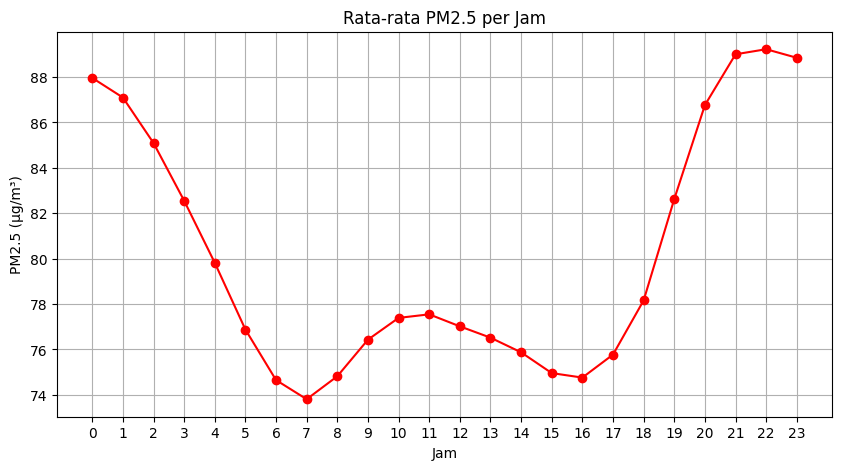

In [155]:
pm25_hourly = air_quality_df.groupby('hour')['PM2.5'].mean()

# Visualisasi PM2.5 per jam
plt.figure(figsize=(10, 5))
plt.plot(pm25_hourly.index, pm25_hourly.values, marker='o', color='red')
plt.title('Rata-rata PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

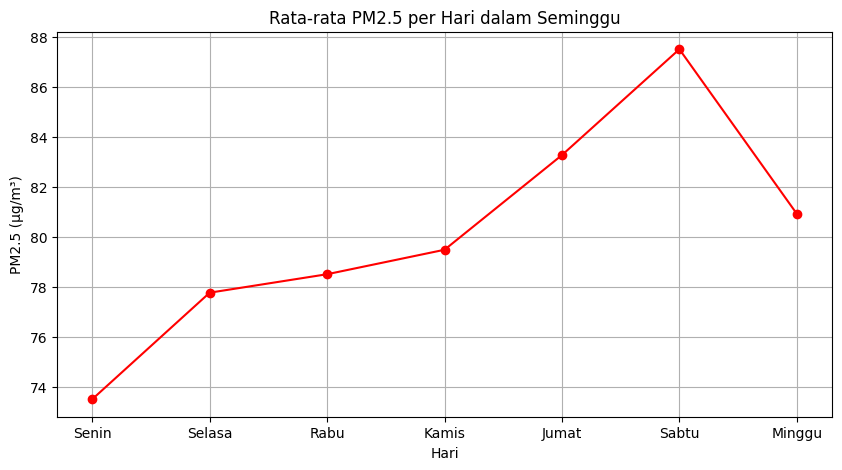

In [156]:
pm25_weekly = air_quality_df.groupby('day_of_week')['PM2.5'].mean()

# Visualisasi PM2.5 per mingguan
plt.figure(figsize=(10, 5))
plt.plot(pm25_weekly.index, pm25_weekly.values, marker='o', color='red')
plt.title('Rata-rata PM2.5 per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(
    ticks=range(0, 7),
    labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'],
)
plt.grid(True)
plt.show()

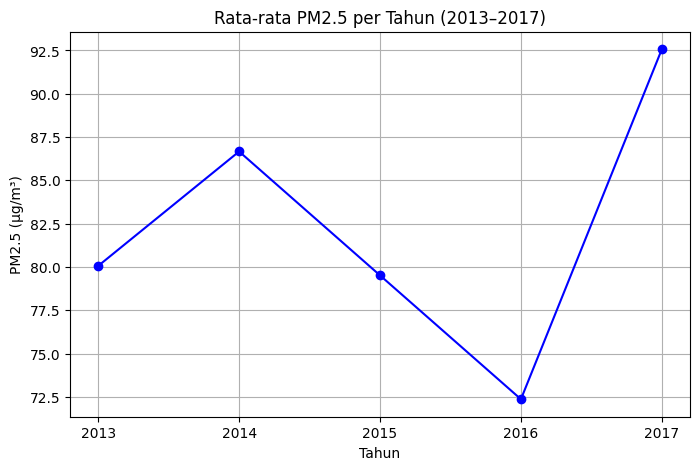

In [157]:
pm25_yearly = air_quality_df.groupby('year')['PM2.5'].mean()

# Visualisasi PM2.5 per tahun
plt.figure(figsize=(8, 5))
plt.plot(pm25_yearly.index, pm25_yearly.values, marker='o', color='blue')
plt.title('Rata-rata PM2.5 per Tahun (2013–2017)')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.xticks(pm25_yearly.index)
plt.show()

### Explore `NO2` dan `CO`

In [158]:
# Informasi NO2
no2_by_station = air_quality_df.groupby('station')['NO2'].agg(['mean', 'std', 'min', 'max']).round(2)
print(no2_by_station.sort_values('mean', ascending=False))

                mean    std   min    max
station                                 
Wanliu         65.97  38.24  1.64  264.0
Aotizhongxin   59.29  37.01  2.00  290.0
Nongzhanguan   58.14  36.47  2.00  273.0
Guanyuan       57.96  35.21  2.00  270.0
Gucheng        55.79  36.55  2.00  276.0
Wanshouxigong  55.64  36.09  2.00  251.0
Tiantan        53.24  32.00  2.00  241.0
Dongsi         52.19  34.48  2.00  258.0
Shunyi         44.56  31.62  2.00  258.0
Changping      44.24  29.65  1.85  226.0
Huairou        32.04  26.30  1.03  231.0
Dingling       27.32  26.32  1.03  205.0


In [159]:
# Informasi CO
co_by_station = air_quality_df.groupby('station')['CO'].agg(['mean', 'std', 'min', 'max']).round(2)
print(co_by_station.sort_values('mean', ascending=False))

                  mean      std    min      max
station                                        
Wanshouxigong  1376.91  1238.86  100.0   9800.0
Dongsi         1363.24  1201.23  100.0  10000.0
Gucheng        1352.70  1236.26  100.0  10000.0
Wanliu         1331.70  1267.96  100.0  10000.0
Nongzhanguan   1325.17  1259.92  100.0  10000.0
Tiantan        1308.28  1184.46  100.0  10000.0
Aotizhongxin   1267.07  1242.12  100.0  10000.0
Guanyuan       1246.66  1154.35  100.0  10000.0
Shunyi         1203.95  1171.42  100.0  10000.0
Changping      1160.04  1127.16  100.0  10000.0
Huairou        1022.40   894.95  100.0  10000.0
Dingling        924.76   897.86  100.0  10000.0


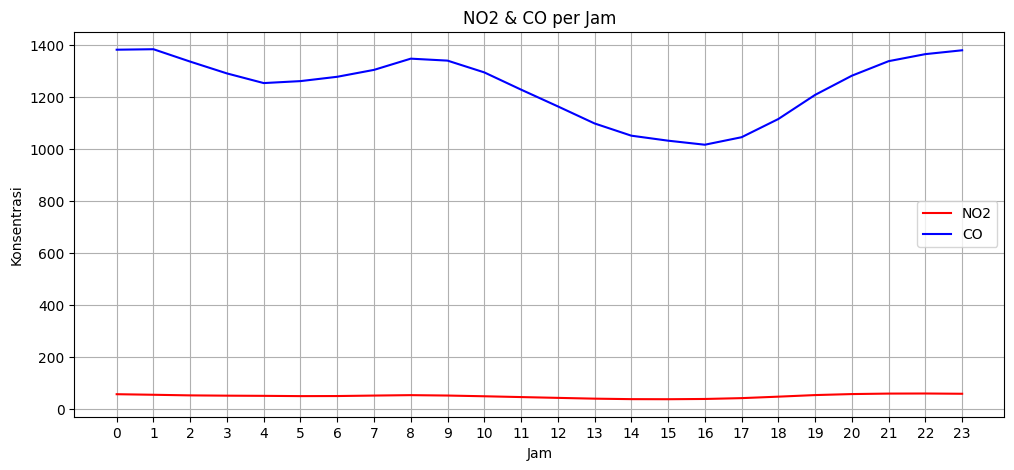

In [160]:
# Visualisasi persebaran NO2 dan CO per jam
plt.figure(figsize=(12, 5))
no2_hourly = air_quality_df.groupby('hour')['NO2'].mean()
co_hourly = air_quality_df.groupby('hour')['CO'].mean()
plt.plot(no2_hourly.index, no2_hourly.values, label='NO2', color='red')
plt.plot(co_hourly.index, co_hourly.values, label='CO', color='blue')
plt.title('NO2 & CO per Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

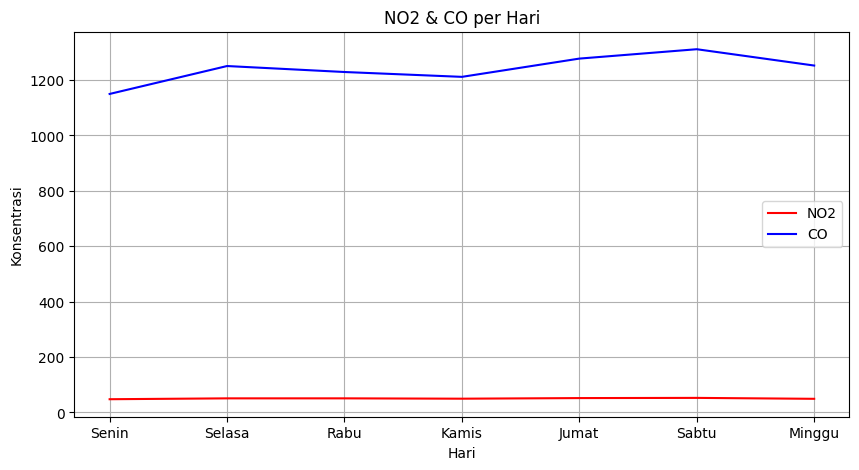

In [161]:
# Visualisasi persebaran NO2 dan CO per mingguan
plt.figure(figsize=(10, 5))
no2_daily = air_quality_df.groupby('day_of_week')['NO2'].mean()
co_daily = air_quality_df.groupby('day_of_week')['CO'].mean()
plt.plot(no2_daily.index, no2_daily.values, label='NO2', color='red')
plt.plot(co_daily.index, co_daily.values, label='CO', color='blue')
plt.title('NO2 & CO per Hari')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi')
plt.xticks(
    ticks=range(0, 7),
    labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'],
)
plt.legend()
plt.grid(True)
plt.show()

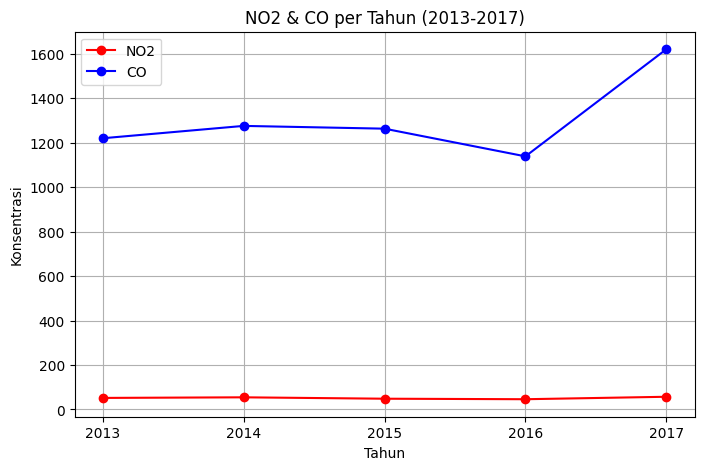

In [162]:
# Visualisasi persebaran NO2 dan CO per tahun
plt.figure(figsize=(8, 5))
no2_yearly = air_quality_df.groupby('year')['NO2'].mean()
co_yearly = air_quality_df.groupby('year')['CO'].mean()
plt.plot(no2_yearly.index, no2_yearly.values, label='NO2', color='red', marker='o')
plt.plot(co_yearly.index, co_yearly.values, label='CO', color='blue', marker='o')
plt.title('NO2 & CO per Tahun (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.xticks(co_yearly.index)
plt.xticks(no2_yearly.index)
plt.legend()
plt.grid(True)
plt.show()

In [163]:
# Hitung variasi relatif (koefisien variasi)
cv_no2 = air_quality_df['NO2'].std() / air_quality_df['NO2'].mean()
cv_pm25 = air_quality_df['PM2.5'].std() / air_quality_df['PM2.5'].mean()

print(f"Koefisien Variasi NO2: {cv_no2:.2f}")
print(f"Koefisien Variasi PM2.5: {cv_pm25:.2f}")

Koefisien Variasi NO2: 0.70
Koefisien Variasi PM2.5: 1.01


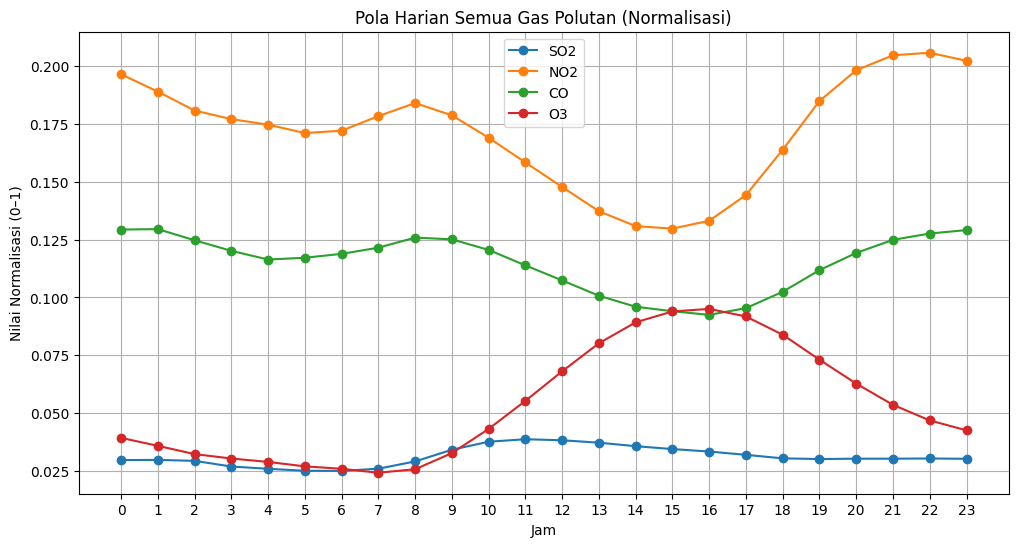

In [164]:
# Normalisasi data agar bisa dibandingkan (skala berbeda)
from sklearn.preprocessing import MinMaxScaler

gases = ['SO2', 'NO2', 'CO', 'O3']
df_gases = air_quality_df[gases].copy()

# Normalisasi ke rentang 0–1
scaler = MinMaxScaler()
df_gases_normalized = pd.DataFrame(
    scaler.fit_transform(df_gases),
    columns=gases,
    index=df_gases.index
)

# Gabungkan dengan kolom jam
df_gases_normalized['hour'] = air_quality_df.index.hour

# Hitung rata-rata per jam
gases_hourly = df_gases_normalized.groupby('hour').mean()

# Plot
plt.figure(figsize=(12, 6))
for gas in gases:
    plt.plot(gases_hourly.index, gases_hourly[gas], label=gas, marker='o')
plt.title('Pola Harian Semua Gas Polutan (Normalisasi)')
plt.xlabel('Jam')
plt.ylabel('Nilai Normalisasi (0–1)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Berdasarkan korelasi yang dibuat terdapat beberapa fitur yang saling berhubungan, yaitu:
  - `PM2.5` punya korelasi tinggi dengan `PM10`, `NO2`, `CO`
  - `PM10` punya korelasi tinggi dengan `PM2.5`, `NO2`, `CO`
  - `O3` memiliki korelasi dengan `TEMP`, dan
  - `TEMP` punya korelasi tinggi dengan `DEWP`.

- `PM2.5` atau partikel polusi udara yang berukuran 2.5 µg/m³ memiliki peningkatan persebaran konsentrasi yang tinggi yaitu dimulai dari jam 6 malam dengan puncak di jam 12 malam dan menurun secara bertahap hingga jam 7 pagi. Kemudian, `PM2.5` memiliki konsentrasi tertinggi di hari Sabtu dan meningkat signifikan pada tahun 2017.

- Diperiksa hubungan `NO2` dan `CO` dalam hitungan waktu, per harinya, dan dalam tahunnya, pola keduanya relatif stabil dengan fluktuasi kecil yang mengikuti aktivitas manusia. Hal ini membuktikan `NO2` dan `CO2` memberikan kontribusi terhadap peningkatan `PM2.5`. Selain itu, kandungan `NO2` dan `CO` dalam `PM2.5` juga membuktikan adanya pengaruh.

- Jika dilihat dari grafik peningkatan polutan yang sudah di normalisasi terbukti `NO2` dan `CO` juga memberi kontribusi yang tinggi pada `PM2.5`.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren konsentrasi PM2.5 dari waktu ke waktu, dan pada periode kapan terjadi peningkatan PM2.5?

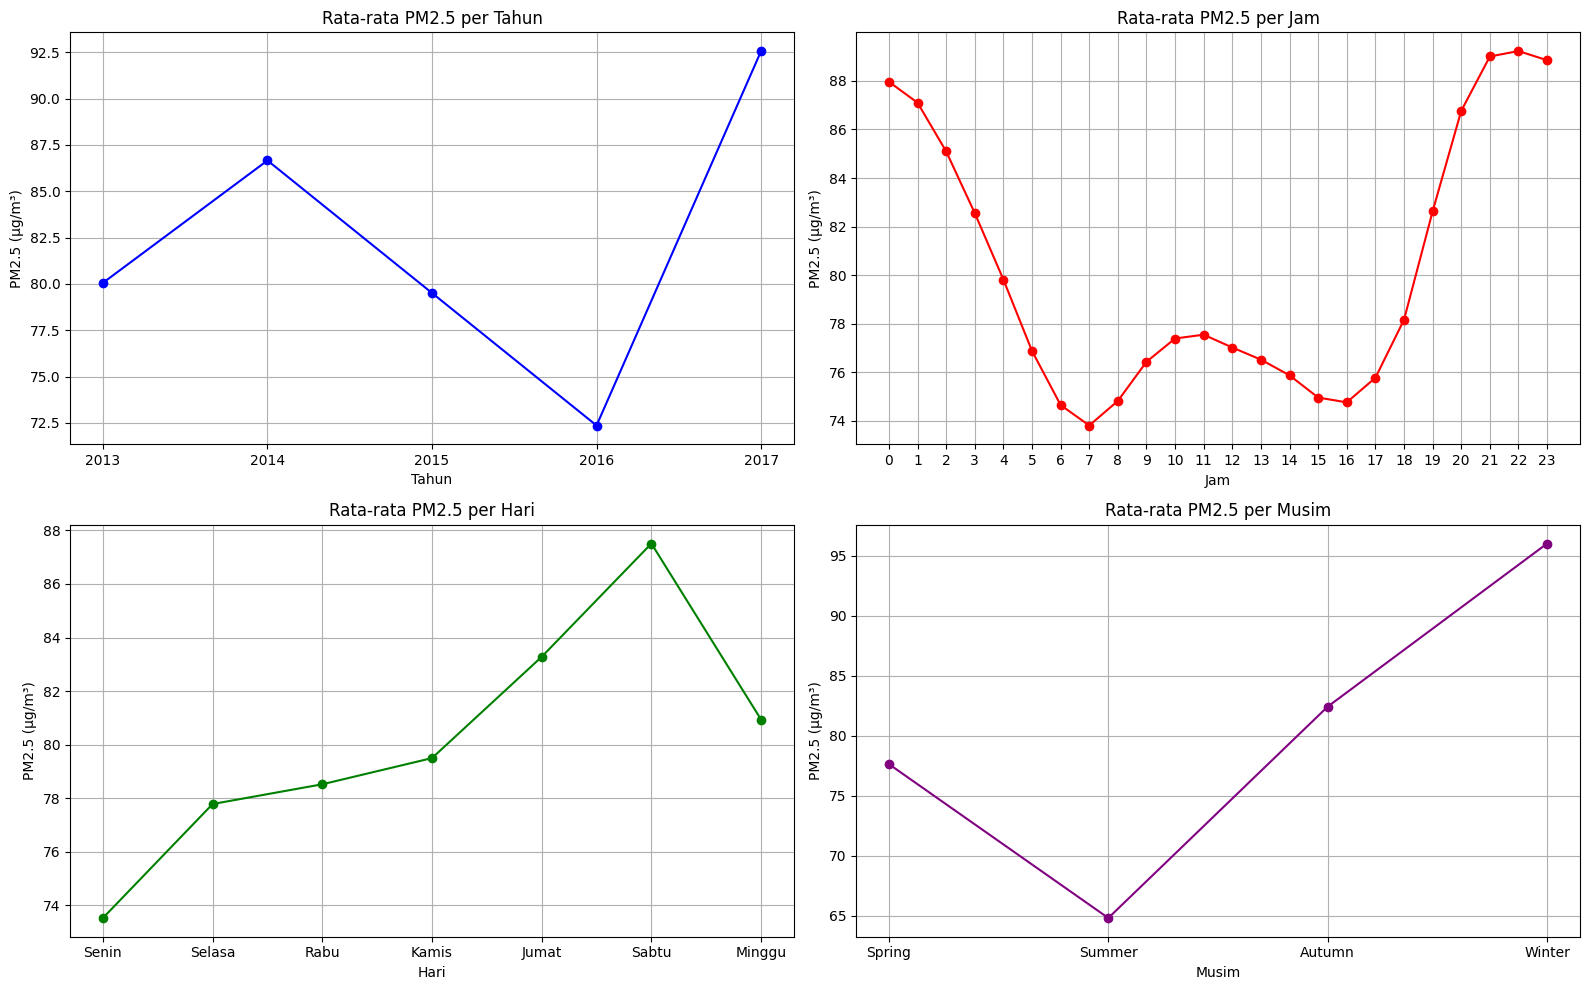

In [165]:
# Fungsi untuk dapatkan musim
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

air_quality_df['season'] = air_quality_df['month'].apply(get_season)

# Hitung rata-rata per periode
pm25_yearly = air_quality_df.groupby('year')['PM2.5'].mean()
pm25_hourly = air_quality_df.groupby('hour')['PM2.5'].mean()
pm25_daily = air_quality_df.groupby('day_of_week')['PM2.5'].mean()
pm25_seasonal = air_quality_df.groupby('season')['PM2.5'].mean().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

# Visualisasi dalam satu figure
plt.figure(figsize=(16, 10))

# Per Tahun
plt.subplot(2, 2, 1)
plt.plot(pm25_yearly.index, pm25_yearly.values, marker='o', color='blue')
plt.title('Rata-rata PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.xticks(pm25_yearly.index)

# Per Jam
plt.subplot(2, 2, 2)
plt.plot(pm25_hourly.index, pm25_hourly.values, marker='o', color='red')
plt.title('Rata-rata PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.xticks(range(0, 24))

# Per Hari dalam Minggu
plt.subplot(2, 2, 3)
plt.plot(pm25_daily.index, pm25_daily.values, marker='o', color='green')
plt.title('Rata-rata PM2.5 per Hari')
plt.xlabel('Hari')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.xticks(
    ticks=range(0, 7),
    labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'],
)

# Per Musim
plt.subplot(2, 2, 4)
plt.plot(pm25_seasonal.index, pm25_seasonal.values, marker='o', color='purple')
plt.title('Rata-rata PM2.5 per Musim')
plt.xlabel('Musim')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Stasiun mana yang memiliki konsentrasi PM2.5 tertinggi?

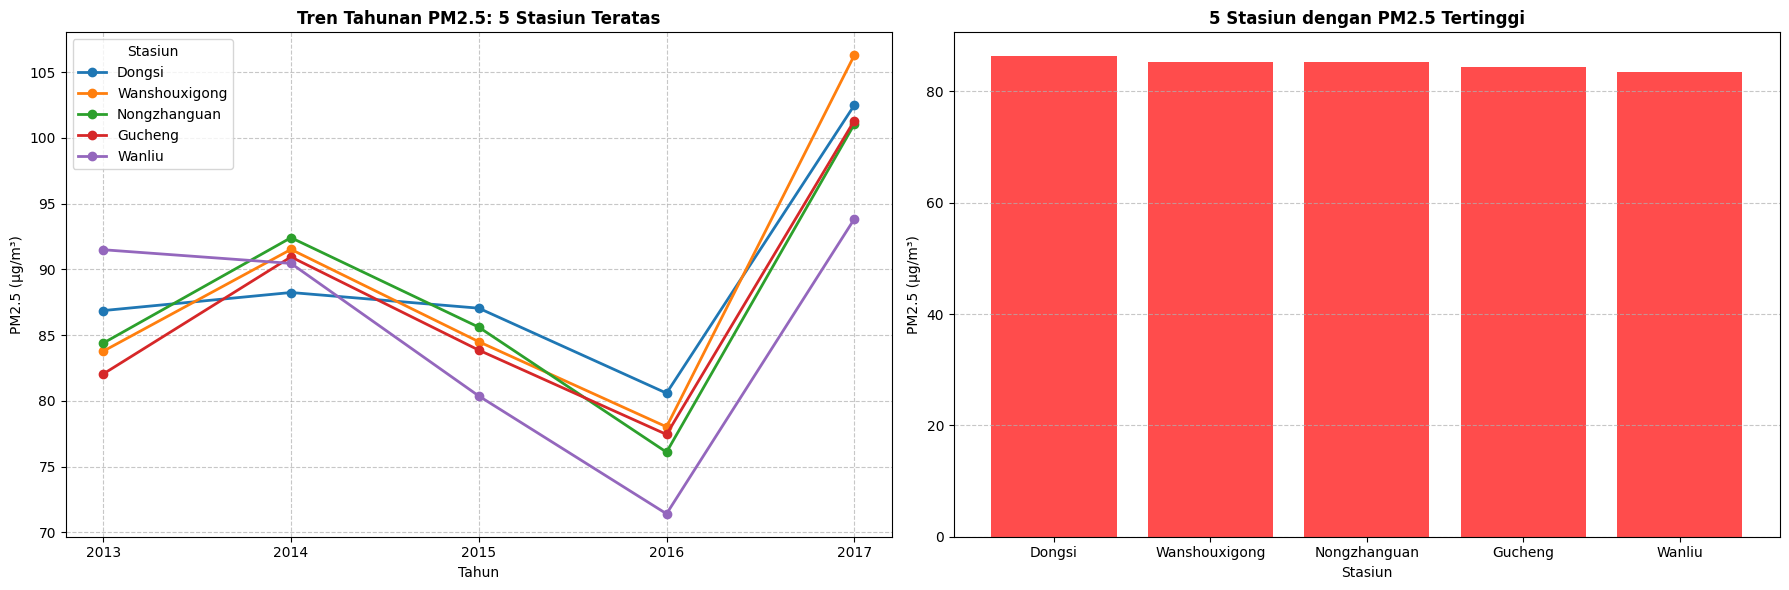

Peringkat 5 Stasiun dengan Rata-rata PM2.5 Tertinggi:
1. Dongsi: 86.31 µg/m³
2. Wanshouxigong: 85.36 µg/m³
3. Nongzhanguan: 85.29 µg/m³
4. Gucheng: 84.35 µg/m³
5. Wanliu: 83.52 µg/m³


In [166]:
# Hitung rata-rata per stasiun dan per tahun
pm25_station_yearly = air_quality_df.groupby(['station', 'year'])['PM2.5'].mean().unstack()

# Identifikasi 5 stasiun teratas
top_5_stations = air_quality_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).head(5)
top_5_names = top_5_stations.index

# Visualisasi: 2 grafik dalam satu figure
plt.figure(figsize=(18, 6))

# Tren Tahunan
plt.subplot(1, 2, 1)
for station in top_5_names:
    plt.plot(pm25_station_yearly.columns, pm25_station_yearly.loc[station],
             marker='o', linewidth=2, label=station, markersize=6)

plt.title('Tren Tahunan PM2.5: 5 Stasiun Teratas', fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2013, 2018))
plt.legend(title='Stasiun')

# Peringkat 5 Stasiun Tertinggi (Bar Plot)
plt.subplot(1, 2, 2)
plt.bar(top_5_names, top_5_stations.values, color='red', alpha=0.7)
plt.title('5 Stasiun dengan PM2.5 Tertinggi', fontweight='bold')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Tampilkan peringkat dalam teks
print("Peringkat 5 Stasiun dengan Rata-rata PM2.5 Tertinggi:")
for i, (station, value) in enumerate(top_5_stations.items(), 1):
    print(f"{i}. {station}: {value:.2f} µg/m³")

**Insight:**
- Berdasarkan **tren peningkatan `PM2.5`**, dapat diperoleh:
  - Peningkatan signifikan terjadi di **tahun 2017**, setelah adalanya penurunan di tahun 2016.
  - Puncak harian peningkatan `PM2.5` terjadi di **malam hari** (jam 21–23).
  - **Sabtu** adalah hari dengan konsentrasi polutan tertinggi, kemungkinan karena aktivitas sosial dan transportasi meningkat.
  - Musim dingin (**_Winter_**) mencatat polusi tertinggi.

- Rata-rata selama periode 2013–2017, **stasiun Dongsi** tercatat memiliki **konsentrasi `PM2.5` tertinggi** yaitu 86.31 µg/m³, diikuti oleh Wanshouxigong (85.36 µg/m³). Namun, jika dilihat tren per tahunnya, pada tahun 2017, Wanshouxigong justru melampaui Dongsi. Ini menunjukkan bahwa:
  - Peringkat stasiun bisa berubah setiap tahun tergantung kondisi lokal.
  - Dongsi tetap paling konsisten tinggi selama 5 tahun.

## Analisis Lanjutan (Opsional)

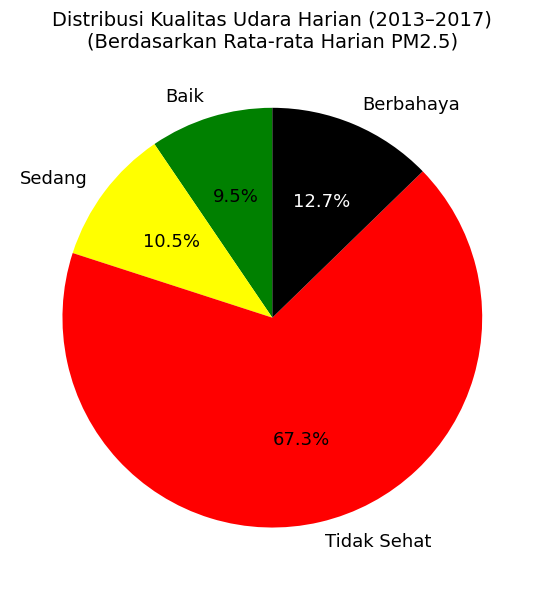

In [167]:
# Data harian (rata-rata per stasiun per hari)
air_quality_df['date'] = air_quality_df.index.date
daily_data = air_quality_df.groupby(['station', 'date'])['PM2.5'].mean().reset_index()

# Melakukan Binning manual yaitu 4 kategori
def categorize_pm25(pm25):
    if pm25 <= 15:
        return 'Baik'
    elif pm25 <= 25:
        return 'Sedang'
    elif pm25 <= 150:
        return 'Tidak Sehat'
    else:
        return 'Berbahaya'

daily_data['kualitas_udara'] = daily_data['PM2.5'].apply(categorize_pm25)

# Hitung persentase tiap kategori
kategori_pct = daily_data['kualitas_udara'].value_counts(normalize=True).reindex(
    ['Baik', 'Sedang', 'Tidak Sehat', 'Berbahaya']
) * 100

# Warna sesuai tingkat risiko
colors = {
    'Baik': 'green',
    'Sedang': 'yellow',
    'Tidak Sehat': 'red',
    'Berbahaya': 'black'
}
color_list = [colors[cat] for cat in kategori_pct.index]

# Buat pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    kategori_pct.values,
    labels=kategori_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=color_list,
    textprops={'fontsize': 13}
)

# Atur teks putih untuk kategori gelap (Berbahaya)
for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    if color_list[i] == 'black':
        autotext.set_color('white')

plt.title('Distribusi Kualitas Udara Harian (2013–2017)\n(Berdasarkan Rata-rata Harian PM2.5)',
          fontsize=14)
plt.tight_layout()
plt.show()

### Analisis Lanjutan: Evaluasi Kualitas Udara Harian dengan Binning Manual

Untuk menilai suatu kualitas udara dikatakan sehat terdapat sebuah patokan dan standar. Menurut WHO (2021), tingkat aman tahunan untuk `PM2.5` adalah kurang dari 15 µg/m³. Namun, untuk memahami risiko kesehatan secara lebih rinci, dilakukan _binning manual_ berdasarkan kombinasi standar WHO dan AQI (_Air Quality Index_). Kelompok tingkat kualitas udara tersebut terbagi menjadi:
  - **Baik**: `PM2.5` ≤ 15 µg/m³ (sesuai rekomendasi WHO)
  - **Sedang**: 15 < `PM2.5` ≤ 25 µg/m³
  - **Tidak Sehat**: 25 < `PM2.5` ≤ 150 µg/m³
  - **Berbahaya**: `PM2.5` > 150 µg/m³
Hasil tersebut divisualisasikan dalam bentuk _pie chart_ untuk menunjukkan persentase selama periode observasi.

Dari hasil pie chart diperoleh informasi:
- Hanya **sebagian kecil** total hari yang memenuhi **standar aman WHO**, sebagian besar (**lebih dari 70%**) memiliki kualitas udara yang **berisiko** bagi kesehatan, baik untuk kelompok rentan maupun populasi umum.
- Adanya sebagian kecil yaitu **12.7%** total hari yang **berbahaya**, yaitu kondisi dimana kualitas udara yang sangat buruk. Sehingga kategori anak-anak, lansia, maupun penderita penyakit pernapasan perlu sangat berhati-hati atau bahkan menghindari untuk melakukan aktivas di luar.

Analisis ini memberikan gambaran yang jelas tentang dampak kualitas udara terhadap kesehatan publik, serta menjadi dasar untuk rekomendasi kebijakan pengendalian emisi.

## Conclusion

Berdasarkan analisis data kualitas udara di beberapa stasiun di Beijing pada periode 2013–2017, dapat disimpulkan bahwa:

1. **Polusi udara di semua stasiun bersifat berbahaya dan dipengaruhi oleh aktivitas manusia serta kondisi cuaca.**  
   - Peningkatan signifikan terjadi di tahun 2017, setelah penurunan sementara di 2016.
   - Puncak harian terjadi di malam hari (jam 21–23), yaitu dimana saat padat penduduk aktivitas pulang kerja.
   - Sabtu dan musim dingin mencatat konsentrasi PM2.5 tertinggi, menunjukkan pengaruh aktivitas sosial dan meteorologi.

2. **Stasiun Dongsi dan Wanshouxigong merupakan area paling terdampak**, dengan Dongsi paling konsisten tinggi selama 5 tahun. Namun, Wanshouxigong melonjak dan menduduki peringkat pertama pada tahun 2017, menunjukkan bahwa peringkat stasiun bisa berubah tergantung kondisi lokal.


Kesimpulan Akhir:  

Polusi udara yang terjadi merupakan dampak langsung dari aktivitas perkotaan dan industri. Perlunya upaya pengendalian dalam menangani tingkat polusi dengan pengurangan emisi kendaraan, pembatasan aktivitas di musim dingin, dan intervensi lokasi spesifik seperti Dongsi dan Wanshouxigong.

In [170]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.22.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2025.12.15.0.40.51
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.30.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
cha

In [171]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>